<a href="https://colab.research.google.com/github/ShaneMcGinley/FYP_Football/blob/main/Predicting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import scipy.stats as scipy
import matplotlib.pyplot as plt
import requests #download from football data
import io 
from __future__ import division
import seaborn as sns
%matplotlib inline

# Allows connection to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Load the Data**

In [2]:
shortURL = '/content/gdrive/MyDrive/Colab Notebooks/Dataset1/'

In [3]:
df1 = pd.read_csv(shortURL + '20-21.csv')
df2 = pd.read_csv(shortURL + '19-20.csv')
df3 = pd.read_csv(shortURL + '18-19.csv')
df4 = pd.read_csv(shortURL + '17-18.csv')
df5 = pd.read_csv(shortURL + '16-17.csv')
df6 = pd.read_csv(shortURL + '15-16.csv')
df7 = pd.read_csv(shortURL + '14-15.csv')
df8 = pd.read_csv(shortURL + '13-14.csv')
df9 = pd.read_csv(shortURL + '12-13.csv')
df10 = pd.read_csv(shortURL + '11-12.csv')
df11 = pd.read_csv(shortURL + '10-11.csv')
df12 = pd.read_csv(shortURL + '09-10.csv')

In [4]:
df1.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,...,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,A,C Kavanagh,5,13,2,6,12,12,2,3,2,2,0,0,6.00,4.33,1.53,5.50,4.25,1.57,6.00,3.90,1.57,6.16,4.51,1.56,6.50,4.2,1.53,6.50,...,4.00,1.66,5.50,4.00,1.62,5.25,3.90,1.67,5.48,3.98,1.69,5.50,3.8,1.65,5.50,3.90,1.67,5.75,4.20,1.71,5.36,3.93,1.67,2.0,1.80,2.06,1.86,2.10,1.92,2.00,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,H,J Moss,5,9,3,5,14,11,7,3,2,1,0,0,3.10,3.25,2.37,3.00,3.20,2.45,3.15,2.95,2.40,3.32,3.29,2.40,3.20,3.2,2.35,3.20,...,3.25,2.40,3.00,3.30,2.40,3.05,2.90,2.45,3.09,3.27,2.54,3.10,3.1,2.45,3.10,3.25,2.45,3.25,3.33,2.55,3.08,3.22,2.47,2.2,1.66,2.26,1.72,2.27,1.78,2.18,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,H,M Oliver,22,6,6,3,9,6,9,0,1,0,0,0,1.28,6.00,9.50,1.26,6.25,10.50,1.35,5.00,8.50,1.31,6.25,9.92,1.27,6.0,10.00,1.30,...,6.00,11.00,1.25,6.25,11.00,1.30,6.00,9.00,1.28,6.34,11.38,1.25,6.0,12.00,1.29,6.00,11.50,1.30,6.75,12.27,1.28,6.16,10.63,1.5,2.62,1.51,2.76,1.53,2.82,1.50,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,D,S Attwell,15,15,3,2,13,7,8,7,2,2,0,0,2.15,3.40,3.40,2.15,3.40,3.40,2.15,3.15,3.40,2.18,3.61,3.50,2.15,3.5,3.40,2.15,...,3.60,3.75,1.95,3.70,3.75,2.05,3.25,3.75,2.04,3.59,3.92,2.00,3.5,3.80,2.00,3.50,3.90,2.07,3.78,3.99,2.01,3.57,3.79,1.9,1.90,2.00,1.92,2.00,2.05,1.91,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,D,A Taylor,7,13,1,7,12,9,2,5,1,1,0,0,3.80,3.60,1.95,3.70,3.60,2.00,3.85,3.20,2.00,4.00,3.59,2.00,3.80,3.6,1.95,4.00,...,3.40,2.20,3.30,3.40,2.20,3.35,3.00,2.30,3.38,3.38,2.32,3.30,3.3,2.25,3.30,3.30,2.30,3.55,3.50,2.38,3.32,3.33,2.28,2.2,1.66,2.23,1.74,2.28,1.82,2.15,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97



<b><h3>Key to Data Headers / Abbreviations:</h3></b>

Div = League Division<br>
Date = Match Date (dd/mm/yy)<br>
Time = Time of match kick off<br>
HomeTeam = Home Team<br>
AwayTeam = Away Team<br>
FTHG and HG = Full Time Home Team Goals<br>
FTAG and AG = Full Time Away Team Goals<br>
FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)<br>
HTHG = Half Time Home Team Goals<br>
HTAG = Half Time Away Team Goals<br>
HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)<br><br>

<b>Match Statistics (where available)</b><br>
Attendance = Crowd Attendance<br>
Referee = Match Referee<br>
HS = Home Team Shots<br>
AS = Away Team Shots<br>
HST = Home Team Shots on Target<br>
AST = Away Team Shots on Target<br>
HHW = Home Team Hit Woodwork<br>
AHW = Away Team Hit Woodwork<br>
HC = Home Team Corners<br>
AC = Away Team Corners<br>
HF = Home Team Fouls Committed<br>
AF = Away Team Fouls Committed<br>
HFKC = Home Team Free Kicks Conceded<br>
AFKC = Away Team Free Kicks Conceded<br>
HO = Home Team Offsides<br>
AO = Away Team Offsides<br>
HY = Home Team Yellow Cards<br>
AY = Away Team Yellow Cards<br>
HR = Home Team Red Cards<br>
AR = Away Team Red Cards<br>
HBP = Home Team Bookings Points (10 = yellow, 25 = red)<br>
ABP = Away Team Bookings Points (10 = yellow, 25 = red)<br>










In [5]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]

frames19_21 = [df1, df2]

framesBefore19_20 = [df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]

seasons = pd.concat(frames)

seasons19_21 = pd.concat(frames19_21)

seasonsBefore19_20 = pd.concat(framesBefore19_20)

In [6]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
seasons.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'SJA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA', 'SBH', 'SBD', 'SBA'],
      dtype='object', length=139)

In [7]:
seasons.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,LBH,LBD,LBA,SJH,SJD,SJA,GBH,GBD,GBA,BSH,BSD,BSA,SBH,SBD,SBA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0.0,3.0,A,0.0,1.0,A,C Kavanagh,5.0,13.0,2.0,6.0,12.0,12.0,2.0,3.0,2.0,2.0,0.0,0.0,6.00,4.33,1.53,5.50,4.25,1.57,6.00,3.90,1.57,6.16,4.51,1.56,6.50,4.2,1.53,6.50,4.20,1.55,6.55,4.55,1.60,5.94,4.34,1.55,1.72,2.10,1.80,2.13,1.84,2.18,1.76,2.10,1.00,1.93,1.97,1.96,1.96,2.00,1.99,1.93,1.95,5.00,4.00,1.66,5.50,4.00,1.62,5.25,3.90,1.67,5.48,3.98,1.69,5.50,3.8,1.65,5.50,3.90,1.67,5.75,4.20,1.71,5.36,3.93,1.67,2.0,1.80,2.06,1.86,2.10,1.92,2.00,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1.0,0.0,H,1.0,0.0,H,J Moss,5.0,9.0,3.0,5.0,14.0,11.0,7.0,3.0,2.0,1.0,0.0,0.0,3.10,3.25,2.37,3.00,3.20,2.45,3.15,2.95,2.40,3.32,3.29,2.40,3.20,3.2,2.35,3.20,3.20,2.40,3.36,3.36,2.50,3.18,3.22,2.39,2.20,1.66,2.34,1.68,2.36,1.73,2.24,1.67,0.25,1.85,2.05,1.88,2.05,1.88,2.07,1.84,2.03,3.00,3.25,2.40,3.00,3.30,2.40,3.05,2.90,2.45,3.09,3.27,2.54,3.10,3.1,2.45,3.10,3.25,2.45,3.25,3.33,2.55,3.08,3.22,2.47,2.2,1.66,2.26,1.72,2.27,1.78,2.18,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,12/09/2020,17:30,Liverpool,Leeds,4.0,3.0,H,3.0,2.0,H,M Oliver,22.0,6.0,6.0,3.0,9.0,6.0,9.0,0.0,1.0,0.0,0.0,0.0,1.28,6.00,9.50,1.26,6.25,10.50,1.35,5.00,8.50,1.31,6.25,9.92,1.27,6.0,10.00,1.30,5.75,10.50,1.35,6.50,10.75,1.30,5.96,9.68,1.53,2.50,1.56,2.60,1.56,2.68,1.52,2.53,-1.50,1.95,1.95,1.97,1.95,2.00,2.08,1.90,1.97,1.25,6.00,11.00,1.25,6.25,11.00,1.30,6.00,9.00,1.28,6.34,11.38,1.25,6.0,12.00,1.29,6.00,11.50,1.30,6.75,12.27,1.28,6.16,10.63,1.5,2.62,1.51,2.76,1.53,2.82,1.50,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,12/09/2020,20:00,West Ham,Newcastle,0.0,2.0,A,0.0,0.0,D,S Attwell,15.0,15.0,3.0,2.0,13.0,7.0,8.0,7.0,2.0,2.0,0.0,0.0,2.15,3.40,3.40,2.15,3.40,3.40,2.15,3.15,3.40,2.18,3.61,3.50,2.15,3.5,3.40,2.15,3.40,3.60,2.24,3.70,3.60,2.15,3.48,3.42,1.90,1.90,2.00,1.91,2.05,1.95,1.97,1.86,-0.50,2.07,1.72,2.17,1.78,2.17,1.81,2.12,1.75,1.95,3.60,3.75,1.95,3.70,3.75,2.05,3.25,3.75,2.04,3.59,3.92,2.00,3.5,3.80,2.00,3.50,3.90,2.07,3.78,3.99,2.01,3.57,3.79,1.9,1.90,2.00,1.92,2.00,2.05,1.91,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,13/09/2020,14:00,West Brom,Leicester,0.0,3.0,A,0.0,0.0,D,A Taylor,7.0,13.0,1.0,7.0,12.0,9.0,2.0,5.0,1.0,1.0,0.0,0.0,3.80,3.60,1.95,3.70,3.60,2.00,3.85,3.20,2.00,4.00,3.59,2.00,3.80,3.6,1.95,4.00,3.50,1.95,4.00,3.82,2.04,3.87,3.57,1.97,1.90,1.90,2.00,1.91,2.02,2.03,1.92,1.90,0.50,1.91,1.99,1.92,2.00,1.93,2.02,1.88,1.97,3.25,3.40,2.20,3.30,3.40,2.20,3.35,3.00,2.30,3.38,3.38,2.32,3.30,3.3,2.25,3.30,3.30,2.30,3.55,3.50,2.38,3.32,3.33,2.28,2.2,1.66,2.23,1.74,2.28,1.82,2.15,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# **Cleaning the Data**

Remove Betting Data - Not needed here
<br>Also removing other meaningless columns



In [8]:
df = seasons.drop(seasons.iloc[:, 24:139], axis=1)
df = df.drop(['Div'], axis=1)
df = df.drop(['Time'], axis=1)

dfb19_20 = seasonsBefore19_20.drop(seasonsBefore19_20.iloc[:, 23:139], axis=1)
dfb19_20 = dfb19_20.drop(['Div'], axis=1)

df19_21 = seasons19_21.drop(seasons19_21.iloc[:, 24:139], axis=1)
df19_21 = df19_21.drop(['Div'], axis=1)
df19_21 = df19_21.drop(['Time'], axis=1)

df20_21 = df1
df20_21 = df20_21.drop(df20_21.iloc[:, 24:139], axis=1)
df20_21 = df20_21.drop(['Div'], axis=1)
df20_21 = df20_21.drop(['Time'], axis=1)


In [9]:
feature_table = df20_21.iloc[:,:23]

In [10]:
# Replacing NaN values with 0 for now
df.fillna(0, inplace=True)

dfb19_20.fillna(0, inplace=True)

df19_21.fillna(0, inplace=True)

df20_21.fillna(0, inplace=True)

In [11]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,12/09/2020,Fulham,Arsenal,0.0,3.0,A,0.0,1.0,A,C Kavanagh,5.0,13.0,2.0,6.0,12.0,12.0,2.0,3.0,2.0,2.0,0.0,0.0
1,12/09/2020,Crystal Palace,Southampton,1.0,0.0,H,1.0,0.0,H,J Moss,5.0,9.0,3.0,5.0,14.0,11.0,7.0,3.0,2.0,1.0,0.0,0.0
2,12/09/2020,Liverpool,Leeds,4.0,3.0,H,3.0,2.0,H,M Oliver,22.0,6.0,6.0,3.0,9.0,6.0,9.0,0.0,1.0,0.0,0.0,0.0
3,12/09/2020,West Ham,Newcastle,0.0,2.0,A,0.0,0.0,D,S Attwell,15.0,15.0,3.0,2.0,13.0,7.0,8.0,7.0,2.0,2.0,0.0,0.0
4,13/09/2020,West Brom,Leicester,0.0,3.0,A,0.0,0.0,D,A Taylor,7.0,13.0,1.0,7.0,12.0,9.0,2.0,5.0,1.0,1.0,0.0,0.0


In [12]:
dfb19_20.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,10/08/2018,Man United,Leicester,2.0,1.0,H,1.0,0.0,H,A Marriner,8.0,13.0,6.0,4.0,11.0,8.0,2.0,5.0,2.0,1.0,0.0,0.0
1,11/08/2018,Bournemouth,Cardiff,2.0,0.0,H,1.0,0.0,H,K Friend,12.0,10.0,4.0,1.0,11.0,9.0,7.0,4.0,1.0,1.0,0.0,0.0
2,11/08/2018,Fulham,Crystal Palace,0.0,2.0,A,0.0,1.0,A,M Dean,15.0,10.0,6.0,9.0,9.0,11.0,5.0,5.0,1.0,2.0,0.0,0.0
3,11/08/2018,Huddersfield,Chelsea,0.0,3.0,A,0.0,2.0,A,C Kavanagh,6.0,13.0,1.0,4.0,9.0,8.0,2.0,5.0,2.0,1.0,0.0,0.0
4,11/08/2018,Newcastle,Tottenham,1.0,2.0,A,1.0,2.0,A,M Atkinson,15.0,15.0,2.0,5.0,11.0,12.0,3.0,5.0,2.0,2.0,0.0,0.0


In [13]:
df19_21.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,12/09/2020,Fulham,Arsenal,0,3,A,0,1,A,C Kavanagh,5,13,2,6,12,12,2,3,2,2,0,0
1,12/09/2020,Crystal Palace,Southampton,1,0,H,1,0,H,J Moss,5,9,3,5,14,11,7,3,2,1,0,0
2,12/09/2020,Liverpool,Leeds,4,3,H,3,2,H,M Oliver,22,6,6,3,9,6,9,0,1,0,0,0
3,12/09/2020,West Ham,Newcastle,0,2,A,0,0,D,S Attwell,15,15,3,2,13,7,8,7,2,2,0,0
4,13/09/2020,West Brom,Leicester,0,3,A,0,0,D,A Taylor,7,13,1,7,12,9,2,5,1,1,0,0


In [14]:
df20_21.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,12/09/2020,Fulham,Arsenal,0,3,A,0,1,A,C Kavanagh,5,13,2,6,12,12,2,3,2,2,0,0
1,12/09/2020,Crystal Palace,Southampton,1,0,H,1,0,H,J Moss,5,9,3,5,14,11,7,3,2,1,0,0
2,12/09/2020,Liverpool,Leeds,4,3,H,3,2,H,M Oliver,22,6,6,3,9,6,9,0,1,0,0,0
3,12/09/2020,West Ham,Newcastle,0,2,A,0,0,D,S Attwell,15,15,3,2,13,7,8,7,2,2,0,0
4,13/09/2020,West Brom,Leicester,0,3,A,0,0,D,A Taylor,7,13,1,7,12,9,2,5,1,1,0,0


# Data Understanding / Exploring
Showing some of the averages for **General** stats - Goals Scored / Commited, Red cards, fouls
<br> Showing the number of wins/losses for Home and Away Teams along with draws

In [15]:
# Overall 
df['FTR'].value_counts()

H    2029
A    1322
D    1094
0       1
Name: FTR, dtype: int64

In [16]:
# Before 19/20 Season
dfb19_20['FTR'].value_counts()

H    1758
A    1102
D     940
0       1
Name: FTR, dtype: int64

In [17]:
# 19/20 Season until Now
df19_21['FTR'].value_counts()

H    271
A    220
D    154
Name: FTR, dtype: int64

In [18]:
# Method for showing the percentages and values in the pie chart below
def make_autopct(y):
    def my_autopct(pct):
        total = sum(y)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

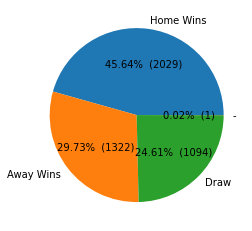

<Figure size 720x720 with 0 Axes>

In [19]:
# Plotting above values on Pie chart
y = df['FTR'].value_counts()

mylabels = ["Home Wins", "Away Wins", "Draw", "-"]

plt.pie(y, labels = mylabels, autopct=make_autopct(y))
plt.figure(figsize=[10, 10])
plt.show()

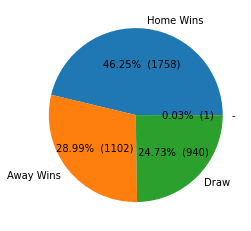

<Figure size 2880x1800 with 0 Axes>

In [20]:
y = dfb19_20['FTR'].value_counts()

mylabels = ["Home Wins", "Away Wins", "Draw", "-"]

plt.pie(y, labels = mylabels, autopct=make_autopct(y))
plt.figure(figsize=(40, 25))
plt.show()

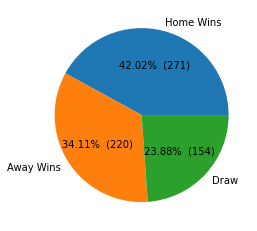

<Figure size 2880x1800 with 0 Axes>

In [21]:
y = df19_21['FTR'].value_counts()

mylabels = ["Home Wins", "Away Wins", "Draw"]

plt.pie(y, labels = mylabels, autopct=make_autopct(y))
plt.figure(figsize=(40, 25))
plt.show()

In [22]:
# Testing Data by finding average goals scored and conceded both home and away
avg_home_goals_overall = df.FTHG.sum()* 1.0 / df.shape[0]
avg_away_goals_overall = df.FTAG.sum()* 1.0 / df.shape[0]
avg_home_goals_overall = round(avg_home_goals_overall, 2)
avg_away_goals_overall = round(avg_away_goals_overall, 2)
avg_home_conceded_overall = avg_away_goals_overall
avg_away_conceded_overall = avg_home_goals_overall

print("Average goals scored at home overall: ", avg_home_goals_overall)
print("Average goals scored away overall: ", avg_away_goals_overall)
print("Average goals conceded at home overall: ", avg_home_conceded_overall)
print("Average goals conceded away overall: ", avg_away_conceded_overall)

#Average Red cards Overall from ALL Seasons
print()
avg_home_red_cards_overall = df.HR.sum()* 1.0 / df.shape[0]
avg_away_red_cards_overall = df.AR.sum()* 1.0 / df.shape[0]
avg_home_red_cards_overall = round(avg_home_red_cards_overall, 2)
avg_away_red_cards_overall = round(avg_away_red_cards_overall, 2)
print("Average Red cards at home after the 18/19 season: ", avg_home_red_cards_overall)
print("Average red cards away after the 18/19 season: ", avg_away_red_cards_overall)

#Average Yellow cards Overall from ALL Seasons
print()
avg_home_yellow_cards_ovr = df.HY.sum()* 1.0 / df.shape[0]
avg_away_yellow_cards_ovr = df.AY.sum()* 1.0 / df.shape[0]
avg_home_yellow_cards_ovr = round(avg_home_yellow_cards_ovr, 2)
avg_away_yellow_cards_ovr = round(avg_away_yellow_cards_ovr, 2)
print("Average yellow cards at home after the 18/19 season: ", avg_home_yellow_cards_ovr)
print("Average yellow cards away after the 18/19 season: ", avg_away_yellow_cards_ovr)

#Average fouls BEFORE the 19/20 season
print()
avg_home_fouls = df.HF.sum() * 1.0 / df.shape[0]
avg_away_fouls = df.AF.sum() * 1.0 / df.shape[0]
avg_home_fouls = round(avg_home_fouls, 2)
avg_away_fouls = round(avg_away_fouls, 2)
print("Average home fouls: ", avg_home_fouls)
print("Average away fouls: ", avg_away_fouls)

Average goals scored at home overall:  1.55
Average goals scored away overall:  1.19
Average goals conceded at home overall:  1.19
Average goals conceded away overall:  1.55

Average Red cards at home after the 18/19 season:  0.06
Average red cards away after the 18/19 season:  0.08

Average yellow cards at home after the 18/19 season:  1.49
Average yellow cards away after the 18/19 season:  1.75

Average home fouls:  10.64
Average away fouls:  11.09


In [23]:
# Average of scores before the 19/20 season
# Testing Data by finding average goals scored and conceded both home and away
avg_home_goals_before_19_20 = dfb19_20.FTHG.sum()* 1.0 / dfb19_20.shape[0]
avg_away_goals_before_19_20 = dfb19_20.FTAG.sum()* 1.0 / dfb19_20.shape[0]

avg_home_conceded_before_19_20 = avg_away_goals_before_19_20
avg_away_conceded_before_19_20 = avg_home_goals_before_19_20
print("Average goals scored at home before season 19/20: ", avg_home_goals_before_19_20)
print("Average goals scored away before season 19/20: ", avg_away_goals_before_19_20)
print("Average goals conceded at home before season 19/20: ", avg_home_conceded_before_19_20)
print("Average goals conceded away before season 19/20: ", avg_away_conceded_before_19_20)

#Average Red cards BEFORE the 19/20 season
print()
avg_home_red_cards_before_19_20 = dfb19_20.HR.sum()* 1.0 / dfb19_20.shape[0]
avg_away_red_cards_before_19_20 = dfb19_20.AR.sum()* 1.0 / dfb19_20.shape[0]
print("Average Red cards at home after the 18/19 season: ", avg_home_red_cards_before_19_20)
print("Average red cards away after the 18/19 season: ", avg_away_red_cards_before_19_20)

#Average Yellow cards BEFORE the 19/20 season
print()
avg_home_yellow_cards_before_19_20 = dfb19_20.HY.sum()* 1.0 / dfb19_20.shape[0]
avg_away_yellow_cards_before_19_20 = dfb19_20.AY.sum()* 1.0 / dfb19_20.shape[0]
avg_home_yellow_cards_before_19_20 = round(avg_home_yellow_cards_before_19_20, 2)
avg_away_yellow_cards_before_19_20 = round(avg_away_yellow_cards_before_19_20, 2)
print("Average yellow cards at home after the 18/19 season: ", avg_home_yellow_cards_ovr)
print("Average yellow cards away after the 18/19 season: ", avg_away_yellow_cards_ovr)

#Average fouls BEFORE the 19/20 season
print()
avg_home_fouls_before_19_20 = dfb19_20.HF.sum() * 1.0 / dfb19_20.shape[0]
avg_away_fouls_before_19_20 = dfb19_20.AF.sum() * 1.0 / dfb19_20.shape[0]
print("Average home fouls: ", avg_home_fouls_before_19_20)
print("Average away fouls: ", avg_away_fouls_before_19_20)

Average goals scored at home before season 19/20:  1.5701131281241778
Average goals scored away before season 19/20:  1.1796895553801632
Average goals conceded at home before season 19/20:  1.1796895553801632
Average goals conceded away before season 19/20:  1.5701131281241778

Average Red cards at home after the 18/19 season:  0.059458037358589844
Average red cards away after the 18/19 season:  0.08708234675085504

Average yellow cards at home after the 18/19 season:  1.49
Average yellow cards away after the 18/19 season:  1.75

Average home fouls:  10.615890555117074
Average away fouls:  11.131018153117601


In [24]:
# Average of home/away goals scored after the 18/19 season
# Testing Data by finding average goals scored and conceded both home and away
avg_home_goals_19_21 = df19_21.FTHG.sum()* 1.0 / df19_21.shape[0]
avg_away_goals_19_21 = df19_21.FTAG.sum()* 1.0 / df19_21.shape[0]
avg_home_conceded_19_21 = avg_away_goals_19_21
avg_away_conceded_19_21 = avg_home_goals_19_21
print("Average goals scored at home after the 18/19 season: ", avg_home_goals_19_21)
print("Average goals scored away after the 18/19 season: ", avg_away_goals_19_21)
print("Average goals conceded at home after the 18/19 season: ", avg_home_conceded_19_21)
print("Average goals conceded away after the 18/19 season: ", avg_away_conceded_19_21)

# Average of home/away goals scored for the 20/21 Season
# Testing Data by finding average goals scored and conceded both home and away
avg_home_goals_20_21 = df20_21.FTHG.sum()* 1.0 / df20_21.shape[0]
avg_away_goals_20_21 = df20_21.FTAG.sum()* 1.0 / df20_21.shape[0]
avg_home_conceded_20_21 = avg_away_goals_20_21
avg_away_conceded_20_21 = avg_home_goals_20_21
print("Average goals scored at home for the 20/21 season: ", avg_home_goals_20_21)
print("Average goals scored away for the 20/21 season: ", avg_away_goals_20_21)
print("Average goals conceded at home for the 20/21 season: ", avg_home_conceded_20_21)
print("Average goals conceded away for the 20/21 season: ", avg_away_conceded_20_21)

#Average Red cards AFTER the 18/19 season
print()
avg_home_red_cards_19_21 = df19_21.HR.sum()* 1.0 / df19_21.shape[0]
avg_away_red_cards_19_21 = df19_21.AR.sum()* 1.0 / df19_21.shape[0]
print("Average red cards at home after the 18/19 season: ", avg_home_red_cards_19_21)
print("Average red cards away after the 18/19 season: ", avg_away_red_cards_19_21)

#Average Yellow cards AFTER the 18/19 season
print()
avg_home_yellow_cards_19_21 = df19_21.HY.sum()* 1.0 / df19_21.shape[0]
avg_away_yellow_cards_19_21 = df19_21.AY.sum()* 1.0 / df19_21.shape[0]
avg_home_yellow_cards_19_21 = round(avg_home_yellow_cards_19_21, 2)
avg_away_yellow_cards_19_21 = round(avg_away_yellow_cards_19_21, 2)
print("Average yellow cards at home after the 18/19 season: ", avg_home_yellow_cards_19_21)
print("Average yellow cards away after the 18/19 season: ", avg_away_yellow_cards_19_21)

#Average fouls AFTER the 18/19 season
print()
avg_home_fouls_19_21 = df19_21.HF.sum() * 1.0 / df19_21.shape[0]
avg_away_fouls_19_21 = df19_21.AF.sum() * 1.0 / df19_21.shape[0]
print("Average home fouls after the 18/19 season: ", round(avg_home_fouls_19_21, 2))
print("Average away fouls after the 18/19 season: ", avg_away_fouls_19_21)

Average goals scored at home after the 18/19 season:  1.4372093023255814
Average goals scored away after the 18/19 season:  1.2465116279069768
Average goals conceded at home after the 18/19 season:  1.2465116279069768
Average goals conceded away after the 18/19 season:  1.4372093023255814
Average goals scored at home for the 20/21 season:  1.3245283018867924
Average goals scored away for the 20/21 season:  1.3056603773584905
Average goals conceded at home for the 20/21 season:  1.3056603773584905
Average goals conceded away for the 20/21 season:  1.3245283018867924

Average red cards at home after the 18/19 season:  0.05426356589147287
Average red cards away after the 18/19 season:  0.06356589147286822

Average yellow cards at home after the 18/19 season:  1.53
Average yellow cards away after the 18/19 season:  1.64

Average home fouls after the 18/19 season:  10.8
Average away fouls after the 18/19 season:  10.868217054263566


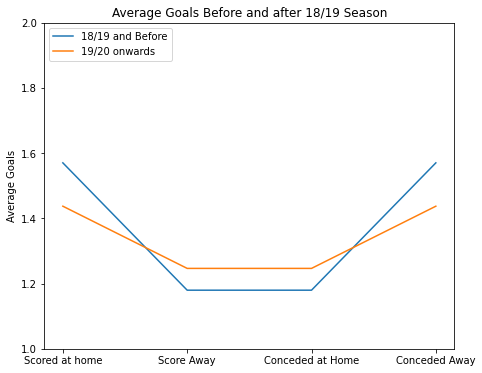

In [25]:
''' --- Plot --- '''
names = ["Scored at home", "Score Away", "Conceded at Home", "Conceded Away"]
values_19 = [avg_home_goals_before_19_20, avg_away_goals_before_19_20, avg_home_conceded_before_19_20, avg_away_conceded_before_19_20]
values_20 = [avg_home_goals_19_21, avg_away_goals_19_21, avg_home_conceded_19_21, avg_away_conceded_19_21]

plt.figure(figsize=(25, 6))
plt.subplot(133)
plt.plot(names, values_19, label="18/19 and Before")
plt.plot(names, values_20, label="19/20 onwards")
plt.legend(loc="upper left")
plt.ylim(1, 2)

plt.ylabel("Average Goals")
plt.title("Average Goals Before and after 18/19 Season")

plt.show()

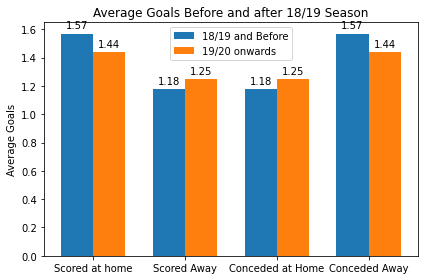

<Figure size 2880x1800 with 0 Axes>

In [26]:
labels = ["Scored at home", "Scored Away", "Conceded at Home", "Conceded Away"]
values_19 = [round(avg_home_goals_before_19_20, 2), round(avg_away_goals_before_19_20, 2), round(avg_home_conceded_before_19_20, 2), round(avg_away_conceded_before_19_20, 2)]
values_20 = [round(avg_home_goals_19_21, 2), round(avg_away_goals_19_21, 2), round(avg_home_conceded_19_21, 2), round(avg_away_conceded_19_21, 2)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, values_19, width, label='18/19 and Before')
rects2 = ax.bar(x + width/2, values_20, width, label='19/20 onwards')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Goals')
ax.set_title('Average Goals Before and after 18/19 Season')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.figure(figsize=(40, 25))
plt.show()

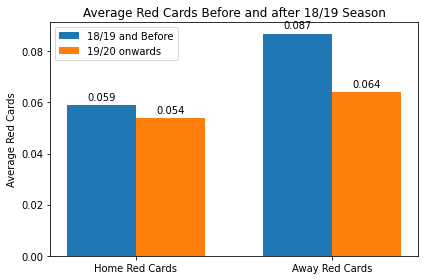

<Figure size 2880x1800 with 0 Axes>

In [27]:
labels = ["Home Red Cards", "Away Red Cards"]
values_19 = [round(avg_home_red_cards_before_19_20, 3), round(avg_away_red_cards_before_19_20, 3)]
values_20 = [round(avg_home_red_cards_19_21, 3), round(avg_away_red_cards_19_21, 3)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, values_19, width, label='18/19 and Before')
rects2 = ax.bar(x + width/2, values_20, width, label='19/20 onwards')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Red Cards')
ax.set_title('Average Red Cards Before and after 18/19 Season')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.figure(figsize=(40, 25))
plt.show()

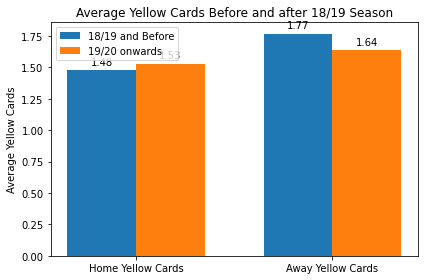

<Figure size 2880x1800 with 0 Axes>

In [28]:
labels = ["Home Yellow Cards", "Away Yellow Cards"]
values_19 = [round(avg_home_yellow_cards_before_19_20, 3), round(avg_away_yellow_cards_before_19_20, 3)]
values_20 = [round(avg_home_yellow_cards_19_21, 3), round(avg_away_yellow_cards_19_21, 3)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, values_19, width, label='18/19 and Before')
rects2 = ax.bar(x + width/2, values_20, width, label='19/20 onwards')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Yellow Cards')
ax.set_title('Average Yellow Cards Before and after 18/19 Season')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.figure(figsize=(40, 25))
plt.show()

In [29]:
#Team, Home Goals Score, Away Goals Score, Attack Strength, Home Goals Conceded, Away Goals Conceded, Defensive Strength
table_20 = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS',))
table_20 = table_20[:-10]
table_20

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS


In [30]:
df = df[:-10]
df.shape[0]

4436

In [31]:
res_home = df.groupby('HomeTeam')
res_away = df.groupby('AwayTeam')

In [32]:
res_home_20 = df20_21.groupby('HomeTeam')
res_away_20 = df20_21.groupby('AwayTeam')

In [33]:
table_20.Team = res_home_20.HomeTeam.indices
table_20.HGS = res_home_20.FTHG.sum().values
table_20.HGC = res_home_20.FTAG.sum().values
table_20.AGS = res_away_20.FTAG.sum().values
table_20.AGC = res_away_20.FTHG.sum().values

In [34]:
table_20.Team

Arsenal                      Arsenal
Aston Villa              Aston Villa
Brighton                    Brighton
Burnley                      Burnley
Chelsea                      Chelsea
Crystal Palace        Crystal Palace
Everton                      Everton
Fulham                        Fulham
Leeds                          Leeds
Leicester                  Leicester
Liverpool                  Liverpool
Man City                    Man City
Man United                Man United
Newcastle                  Newcastle
Sheffield United    Sheffield United
Southampton              Southampton
Tottenham                  Tottenham
West Brom                  West Brom
West Ham                    West Ham
Wolves                        Wolves
Name: Team, dtype: object

In [35]:
num_games = df.shape[0]/20

In [36]:
num_games

221.8

In [37]:
num_games_20 = df20_21.shape[0]/20
num_games_20

13.25

In [38]:
table_20.HAS = (table_20.HGS / num_games_20) / avg_home_goals_20_21
table_20.AAS = (table_20.AGS / num_games_20) / avg_away_goals_20_21
table_20.HDS = (table_20.HGC / num_games_20) / avg_home_conceded_20_21
table_20.ADS = (table_20.AGC / num_games_20) / avg_away_conceded_20_21
table_20

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
Arsenal,Arsenal,16,18,0.911681,1.040462,14,13,0.809249,0.740741
Aston Villa,Aston Villa,20,18,1.139601,1.040462,16,11,0.924855,0.626781
Brighton,Brighton,12,14,0.683761,0.809249,17,16,0.982659,0.911681
Burnley,Burnley,11,8,0.626781,0.462428,15,20,0.867052,1.139601
Chelsea,Chelsea,23,19,1.310541,1.098266,11,14,0.635838,0.797721
Crystal Palace,Crystal Palace,14,15,0.797721,0.867052,21,22,1.213873,1.253561
Everton,Everton,18,21,1.025641,1.213873,20,13,1.156069,0.740741
Fulham,Fulham,8,13,0.455840,0.751445,18,15,1.040462,0.854701
Leeds,Leeds,19,24,1.082621,1.387283,17,27,0.982659,1.538462
Leicester,Leicester,20,26,1.139601,1.502890,19,12,1.098266,0.683761


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


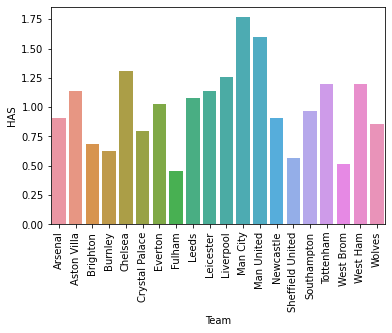

In [39]:
has_plot = sns.barplot(table_20.Team,table_20.HAS)
for item in has_plot.get_xticklabels():
    item.set_rotation(90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


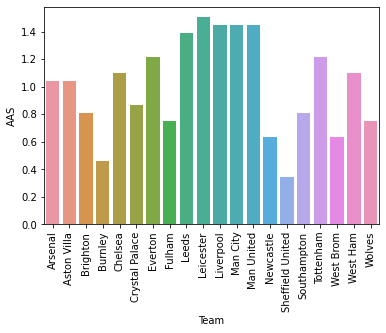

In [40]:
has_plot = sns.barplot(table_20.Team,table_20.AAS)
for item in has_plot.get_xticklabels():
    item.set_rotation(90)

In [41]:
''' 
feature_table contains all the fixtures in the current season.
ftr = full time result
hst = home shots on target
ast = away shots on target
'''

feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST']]
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feature_table.iterrows():
    f_HAS.append(table_20[table_20['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_20[table_20['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_20[table_20['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table_20[table_20['Team'] == row['AwayTeam']]['ADS'].values[0])
    
feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS

In [42]:
feature_table.head(30)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS
0,Fulham,Arsenal,A,2,6,0.455840,1.040462,1.040462,0.740741
1,Crystal Palace,Southampton,H,3,5,0.797721,1.213873,0.809249,1.595442
2,Liverpool,Leeds,H,6,3,1.253561,0.982659,1.387283,1.538462
3,West Ham,Newcastle,A,3,2,1.196581,0.867052,0.635838,1.253561
4,West Brom,Leicester,A,1,7,0.512821,1.907514,1.502890,0.683761
5,Tottenham,Everton,A,5,4,1.196581,0.751445,1.213873,0.740741
6,Brighton,Chelsea,A,3,5,0.683761,0.982659,1.098266,0.797721
7,Sheffield United,Wolves,A,2,4,0.569801,1.156069,0.751445,1.310541
8,Everton,West Brom,H,7,4,1.025641,1.156069,0.635838,1.310541
9,Leeds,Fulham,H,7,6,1.082621,0.982659,0.751445,0.854701


In [43]:
def transformResult(row):
    '''Converts results (H,A or D) into numeric values (1, -1 or 0)'''
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [44]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)

In [45]:
feature_table.head(30)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,Result
0,Fulham,Arsenal,A,2,6,0.455840,1.040462,1.040462,0.740741,-1
1,Crystal Palace,Southampton,H,3,5,0.797721,1.213873,0.809249,1.595442,1
2,Liverpool,Leeds,H,6,3,1.253561,0.982659,1.387283,1.538462,1
3,West Ham,Newcastle,A,3,2,1.196581,0.867052,0.635838,1.253561,-1
4,West Brom,Leicester,A,1,7,0.512821,1.907514,1.502890,0.683761,-1
5,Tottenham,Everton,A,5,4,1.196581,0.751445,1.213873,0.740741,-1
6,Brighton,Chelsea,A,3,5,0.683761,0.982659,1.098266,0.797721,-1
7,Sheffield United,Wolves,A,2,4,0.569801,1.156069,0.751445,1.310541,-1
8,Everton,West Brom,H,7,4,1.025641,1.156069,0.635838,1.310541,1
9,Leeds,Fulham,H,7,6,1.082621,0.982659,0.751445,0.854701,1


## Classifiers

# Add Recent Performance

# Add home advantage